# 연습문제 1

-작업준비

In [59]:
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- 그래프 전역설정

In [33]:
# 폰트 설정
#plt.rcParams['font.family'] = "Malgun Gothic" # 윈도우 전용
plt.rcParams['font.family'] = "Malgun Gothic"
#글자 크기
plt.rcParams["font.size"] = 12
# 그래프 크기설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)
# 유티코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

### 문제 1

- 데이터 가져오기

In [34]:
df = read_excel("https://data.hossam.kr/D01/bitcoin.xlsx")
df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...,...
755,2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
756,2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
757,2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199
758,2023-06-29,30445.7,30077.3,30823.1,30051.3,49.57K,0.0122


- xticks 함수에서 사용할 x좌표 생성

In [35]:
x = list(range(0, len(df['날짜'])))
# print(x)
xticks = list(range(0, len(df['날짜']), 40))
# xticks

- xticks 함수에서 출력할 날짜값 추출

In [36]:
date = []
for i in xticks:
    date.append(df['날짜'][i].strftime("%y/%m/%d"))
print(date)

['21/06/01', '21/07/11', '21/08/20', '21/09/29', '21/11/08', '21/12/18', '22/01/27', '22/03/08', '22/04/17', '22/05/27', '22/07/06', '22/08/15', '22/09/24', '22/11/03', '22/12/13', '23/01/22', '23/03/03', '23/04/12', '23/05/22']


- Line Plot 그리기

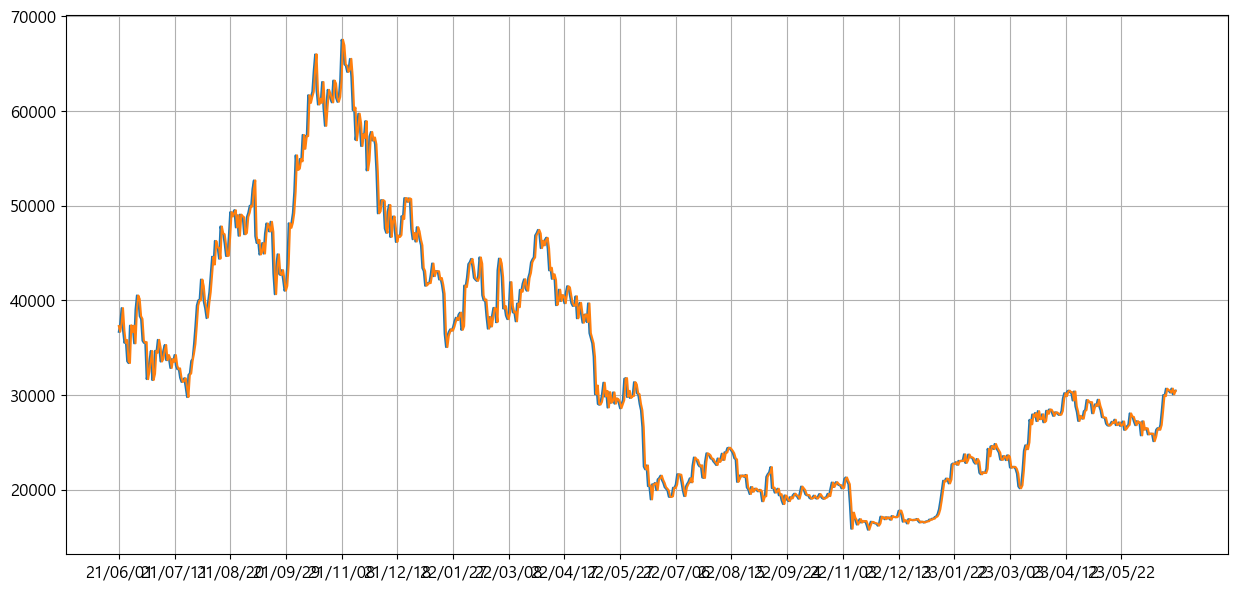

In [37]:
plt.figure()
plt.plot(x, list(df['종가']))
plt.plot(x, list(df['시가']))
plt.xticks(xticks, date)
plt.grid()
plt.show()
plt.close()

### 문제 2

- 데이터가져오기

In [41]:
df = read_excel("https://data.hossam.kr/D01/senior_lsf.xlsx")
df

,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


- 데이터 전처리

- 복지시설 수의 내림차순 정렬

In [42]:
df2 = df.sort_values('복지시설', ascending=False)
# ascending=False 는 내림차순
df2

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
16,Guro-gu,192
14,Yangcheon-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


- 상위 10개 추출

In [43]:
df3 = df2.head(10)
df3

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
16,Guro-gu,192
14,Yangcheon-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


- 시각화

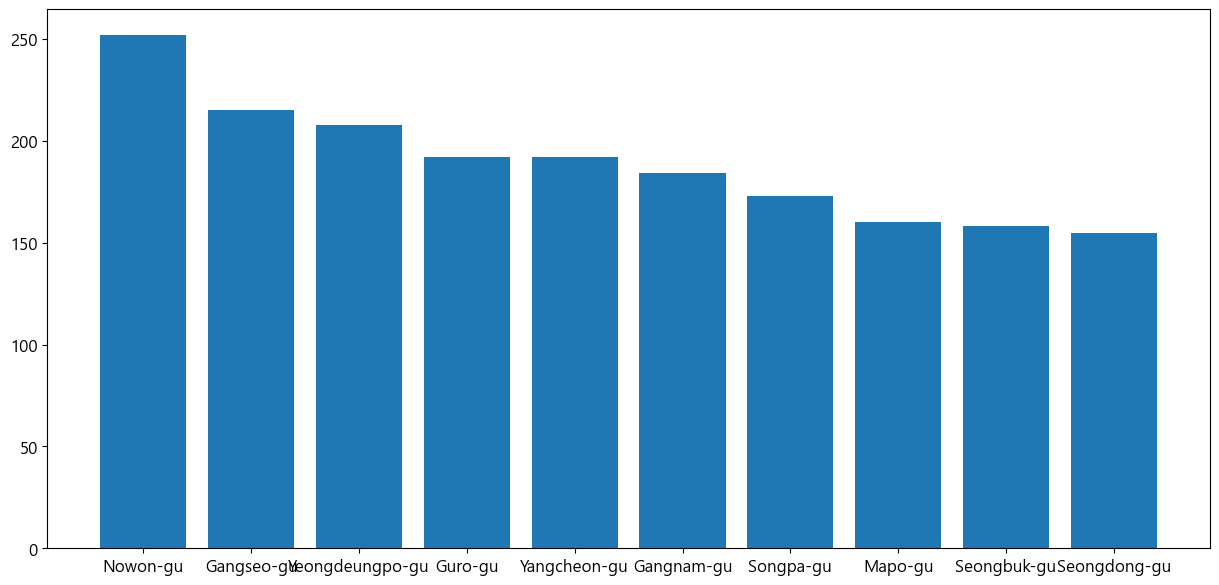

In [44]:
plt.figure()
plt.bar(df3['지역명'], df3['복지시설'])
plt.show()
plt.close()

### 문제 3

- 데이터 가져오기

In [54]:
df = read_excel("https://data.hossam.kr/D01/city_people.xlsx")
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


데이터 전처리 

- 2015, 2010년 데이터 추출

In [57]:
df2 = df.query("연도 == 2015 or 연도 == 2010")
df2

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


피벗 테이블 및 시각화

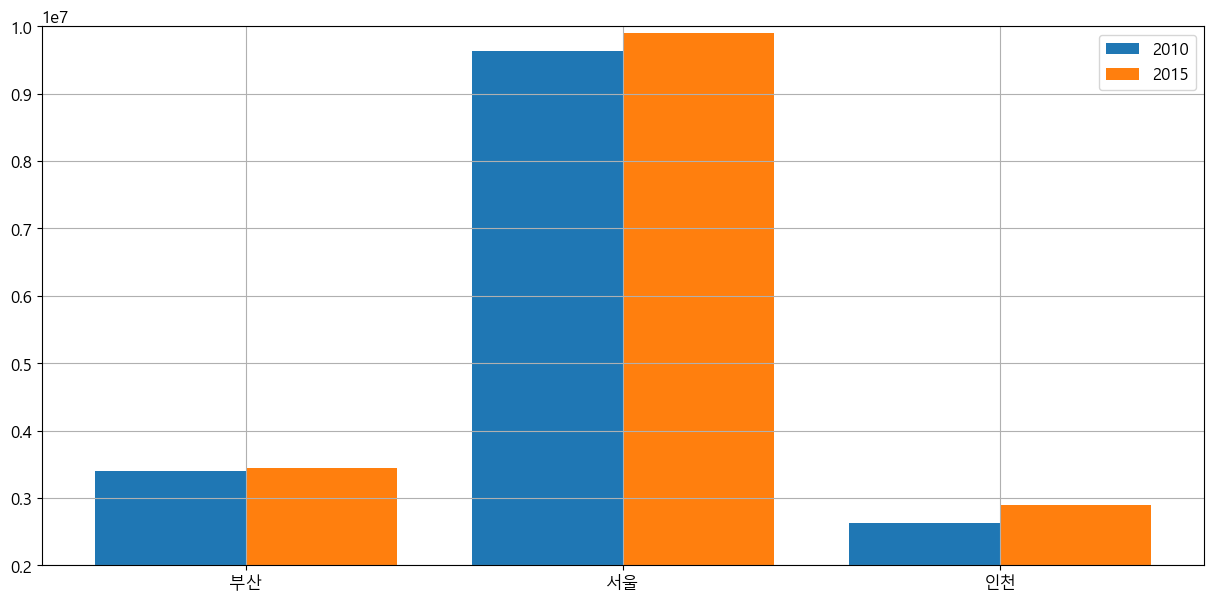

In [64]:
df3 = pivot_table(df2, index='도시', columns='연도', values='인구')
df3
x = np.array(range(0, len(df3.index)))
# 넘파이의 array 함수에 리스트를 넣으면 ndarray 클래스 객체 즉, 배열로 변환해 준다. 
# 따라서 1 차원 배열을 만드는 방법은 다음과 같다.
plt.figure()
plt.bar(x-0.2, df3[2010], label="2010", width=0.4)
plt.bar(x+0.2, df3[2015], label="2015", width=0.4)
plt.grid()
plt.legend()
plt.xticks(x, df3.index)
plt.ylim(2000000,10000000)
plt.show()
plt.close()

In [65]:
df = read_excel("https://data.hossam.kr/D01/jobs_by_scale.xlsx")
df

,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


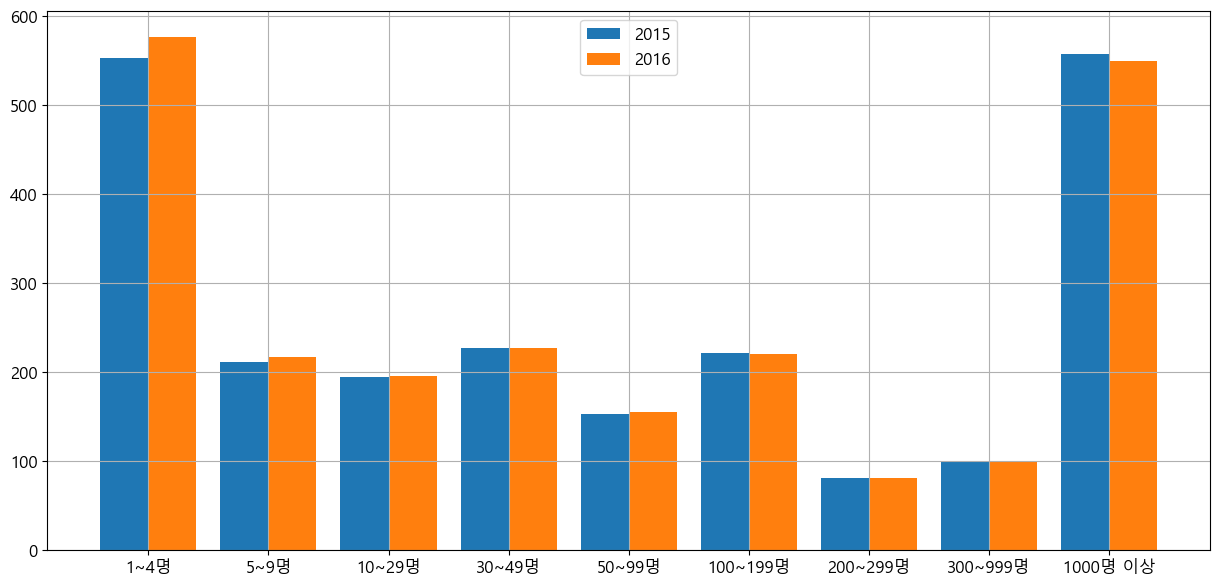

In [67]:
plt.figure()
plt.bar(df.index-0.2, df[2015], label="2015", width=0.4)
plt.bar(df.index+0.2, df[2016], label="2016", width=0.4)
plt.grid()
plt.legend()
plt.xticks(df.index, df['종사자규모별'])
plt.show()
plt.close()

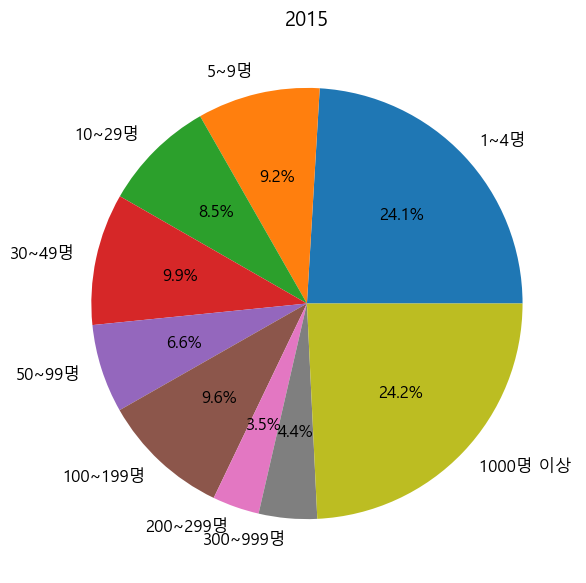

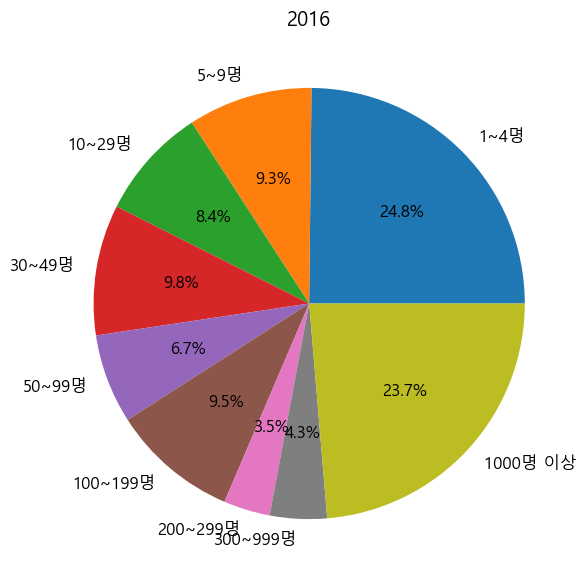

In [70]:
plt.figure()
plt.title("2015")
plt.pie(df[2015], labels=df['종사자규모별'], 
        autopct='%0.1f%%') #shadow=True 음영효과
# startangle = 몇 도만큼 회전
plt.show()
plt.close()

plt.figure()
plt.title("2016")
plt.pie(df[2016], labels=df['종사자규모별'], 
        autopct='%0.1f%%') #shadow=True 음영효과
# startangle = 몇 도만큼 회전
plt.show()
plt.close()

In [71]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc.xlsx")
df

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


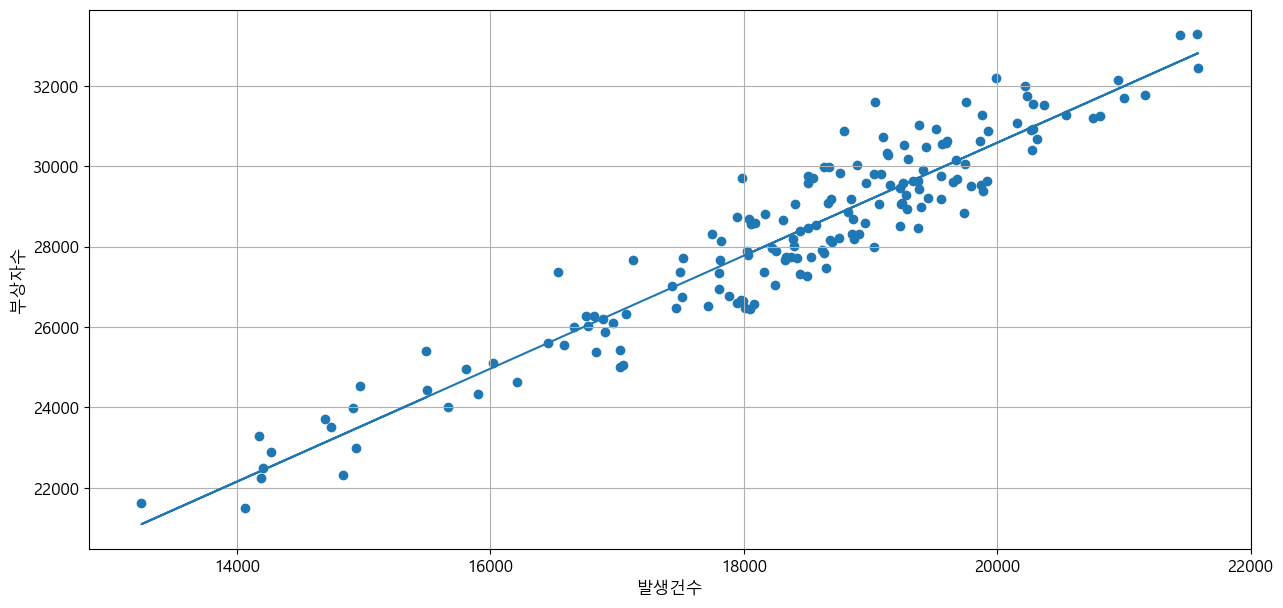

In [85]:
plt.figure()
f = np.poly1d(z)
plt.scatter(df['발생건수'], df['부상자수'])
plt.plot(df['발생건수'], f(df['발생건수']))
plt.xlabel('발생건수')
plt.ylabel("부상자수")
plt.grid()
plt.show()
plt.close()

In [81]:
기울기, 절편 = np.polyfit(df['발생건수'], df['부상자수'], 1)# 1차방정식
z = np.polyfit(df['발생건수'], df['부상자수'], 1)# 1차방정식
print("기울기(가중치) = %f" % 기울기)
print("절편(편향) = %f" % 절편)
np.polyfit()
# polyfit
# 주어진 데이터를 설명해주는 다항식을 생성해내고, cofficient를 반환한다.
# (무엇을 반환하는가? 공식 문서: Returns polynomial coefficients, highest power first.)

# np.poly1d(x)
# 다항식 함수를 반환한다. x에 값을 넣으면, 다항식으로 계산된 결과가 출력된다.

기울기(가중치) = 1.404418
절편(편향) = 2495.338547


In [82]:
f = np.poly1d(z)
f

poly1d([1.40441810e+00, 2.49533855e+03])

In [83]:
f(1) #

2496.7429648532907

In [84]:
f(df['발생건수'])

array([24255.39254637, 21095.45182744, 25780.59060004, 27517.8557864 ,
       29298.65793378, 27904.07076316, 28722.84651389, 29228.43702892,
       28840.81763406, 30242.42689517, 29360.45233006, 28482.69101925,
       23520.88188148, 22536.38479527, 26043.21678423, 27701.83455715,
       29375.90092913, 26981.36807323, 28665.2653719 , 28889.97226747,
       29590.77689802, 29319.72420524, 30410.95706684, 27095.12593911,
       23440.83004993, 23134.66690472, 28007.99770236, 27852.10729356,
       29550.0487732 , 28210.23390837, 27826.82776781, 27749.58477246,
       28485.49985544, 29215.79726604, 27515.04695021, 26217.3646283 ,
       23197.8657191 , 22404.36949412, 26022.15051277, 27069.84641336,
       29902.55771562, 28932.10481039, 29968.56536619, 28540.27216124,
       27807.16591445, 30479.77355361, 30017.7199996 , 28705.99349672,
       25713.17853137, 24266.62789114, 28089.453952  , 29394.1583644 ,
       30916.54758187, 29528.98250174, 30978.34197816, 30573.86956613,
      